In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import tensorflow as tf
import matplotlib.pyplot as plt
# %matplotlib.inline
from tensorflow import keras
%load_ext tensorboard


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
(X_train,y_train),(X_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
len(X_train)

60000

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

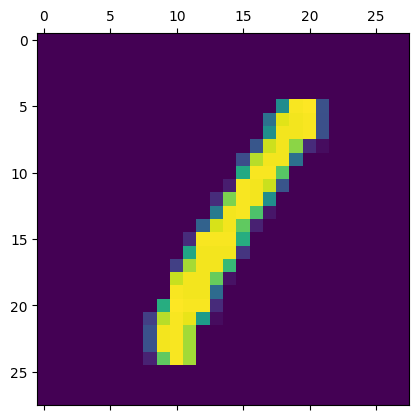

In [6]:
plt.matshow(X_train[3])

In [7]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [8]:
X_train=X_train.reshape(len(X_train),28*28)/255
X_test=X_test.reshape(len(X_test),28*28)/255

In [9]:
X_train.shape,X_test.shape

((60000, 784), (10000, 784))

In [10]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation="sigmoid")
])

model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 2ms/step - loss: 0.4659 - accuracy: 0.8772
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3030 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2829 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2726 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2668 - accuracy: 0.9255


In [11]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2695 - accuracy: 0.9259


[0.2695314288139343, 0.9258999824523926]

In [12]:
y_predicted=model.predict(X_test)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([2.7312519e-02, 4.5193246e-07, 5.4597847e-02, 9.6402884e-01,
       1.5133418e-03, 1.1116747e-01, 1.4379721e-06, 9.9974507e-01,
       7.3333994e-02, 5.9455091e-01], dtype=float32)

In [13]:
# plt.matshow(X_train[1])

In [14]:
np.argmax(y_predicted[1])

2

In [15]:
y_predict_label=[np.argmax(i) for i in y_predicted]
y_predict_label[:5]

[7, 2, 1, 0, 4]

In [16]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predict_label)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    1,    2,    0,    3,    5,    2,    1,    0],
       [   0, 1116,    3,    2,    0,    1,    4,    2,    7,    0],
       [   9,    9,  917,   22,    7,    2,   13,   10,   39,    4],
       [   3,    0,   14,  935,    0,   18,    2,   10,   20,    8],
       [   2,    2,    3,    2,  906,    0,   12,    4,    9,   42],
       [  11,    2,    3,   44,    6,  762,   16,    5,   36,    7],
       [  14,    3,    5,    1,    7,    8,  915,    2,    3,    0],
       [   1,    7,   21,   10,    5,    1,    0,  950,    1,   32],
       [   7,    9,    7,   27,    9,   17,    8,   11,  869,   10],
       [  11,    7,    1,   13,   22,    5,    0,   22,    5,  923]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'truth')

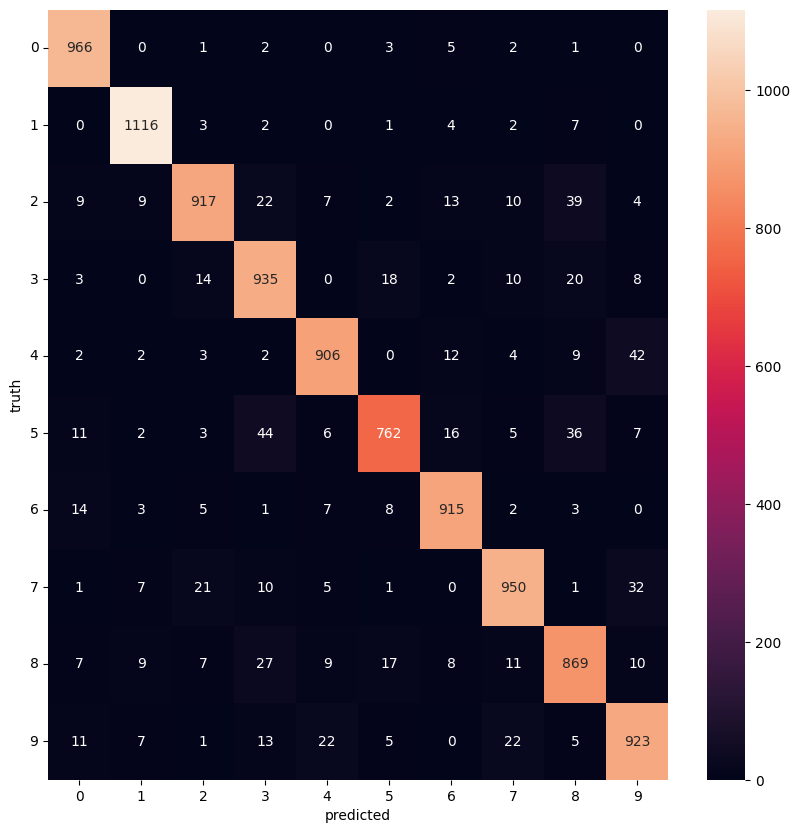

In [17]:
import seaborn as sns 
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("predicted")
plt.yticks(rotation=360)
plt.ylabel("truth")

In [18]:
# rm -rf ./logs/

model=keras.Sequential([
    keras.layers.Dense(150,input_shape=(784,),activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])
log_dir = "logs/"
tb_callbacks=tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
# 
model.compile(
        optimizer="adam",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"])

model.fit(X_train,y_train,epochs=5,callbacks=[tb_callbacks])

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2493 - accuracy: 0.9291
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1071 - accuracy: 0.9678
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0739 - accuracy: 0.9778
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0542 - accuracy: 0.9838
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0428 - accuracy: 0.9861


In [19]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0718 - accuracy: 0.9768


[0.0717865526676178, 0.9768000245094299]

In [20]:
## We have got the accuracy of 97.8% to predict the correct number from the images.
%tensorboard --logdir logs